In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ Libraries ready!")

# Load dataset (make sure the CSV is uploaded)
df = pd.read_csv("Melbourne_housing_FULL.csv")

print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()


✅ Libraries ready!
Rows: 34857 | Columns: 21


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
df = df.dropna(subset=['Price', 'Suburb', 'Distance'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

print("✅ Data cleaned. Available years:", df['Year'].dropna().unique()[:10])


✅ Data cleaned. Available years: [2016. 2017. 2018.]


<ipython-input-9-7cbfa7b6d41b>:9: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


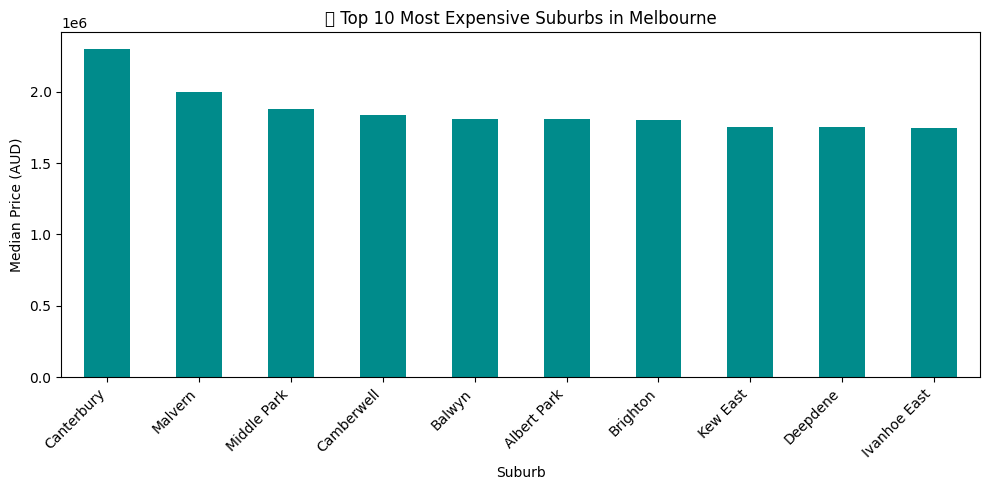

In [9]:
suburb_price = df.groupby('Suburb')['Price'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
suburb_price.plot(kind='bar', color='darkcyan')
plt.title("🏙️ Top 10 Most Expensive Suburbs in Melbourne")
plt.ylabel("Median Price (AUD)")
plt.xlabel("Suburb")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


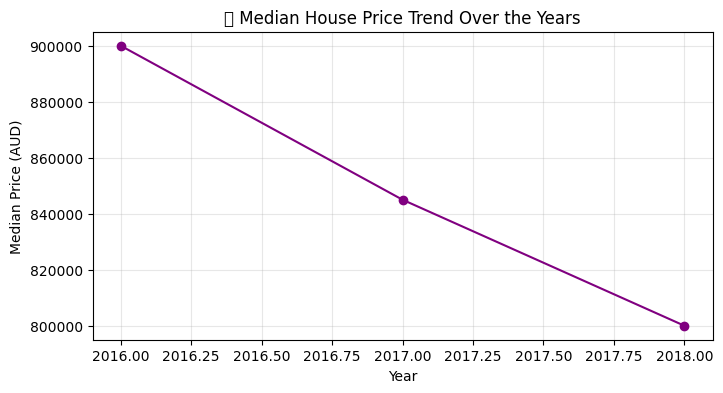

In [10]:
trend = df.groupby('Year')['Price'].median()

plt.figure(figsize=(8,4))
trend.plot(marker='o', color='purple')
plt.title("📆 Median House Price Trend Over the Years")
plt.ylabel("Median Price (AUD)")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.show()


/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


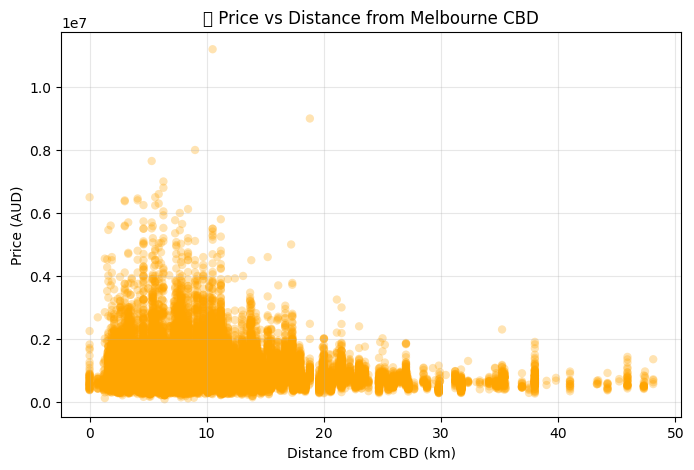

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance'], df['Price'], alpha=0.3, color='orange', edgecolors='none')
plt.title("📍 Price vs Distance from Melbourne CBD")
plt.xlabel("Distance from CBD (km)")
plt.ylabel("Price (AUD)")
plt.grid(alpha=0.3)
plt.show()


<ipython-input-12-1c7999fc5b57>:10: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


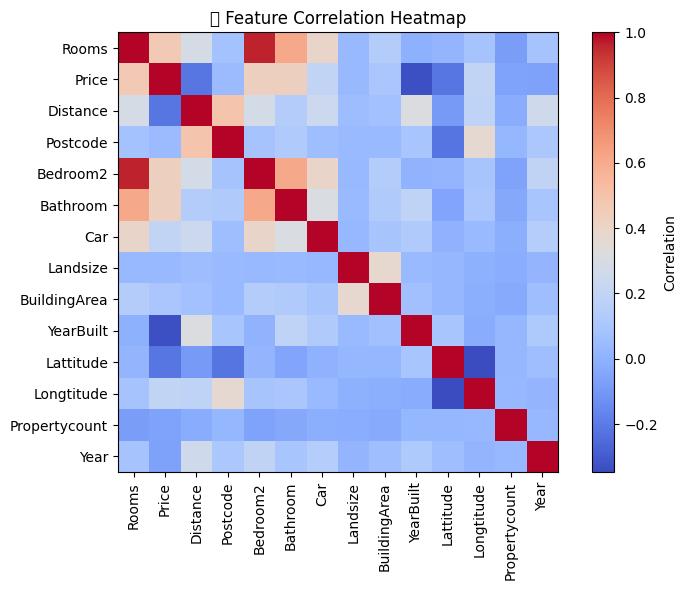

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.title("🔗 Feature Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


In [13]:
suburb_price = df.groupby('Suburb')['Price'].median().sort_values(ascending=False)
most_expensive = suburb_price.index[0]
least_expensive = suburb_price.index[-1]

print("📊 Total Properties:", len(df))
print(f"💎 Most Expensive Suburb: {most_expensive} (${suburb_price.iloc[0]:,.0f})")
print(f"🏠 Least Expensive Suburb: {least_expensive} (${suburb_price.iloc[-1]:,.0f})")

corr_price = numeric_df.corr()['Price'].sort_values(ascending=False)
print("\n🔍 Correlation with Price:\n", corr_price.head(7))
print("\n✅ Observation: Distance from CBD shows strong negative correlation — confirming proximity increases value.")


📊 Total Properties: 27246
💎 Most Expensive Suburb: Canterbury ($2,300,000)
🏠 Least Expensive Suburb: Kurunjang ($375,000)

🔍 Correlation with Price:
 Price           1.000000
Rooms           0.465242
Bedroom2        0.430275
Bathroom        0.429878
Car             0.201803
Longtitude      0.197874
BuildingArea    0.100754
Name: Price, dtype: float64

✅ Observation: Distance from CBD shows strong negative correlation — confirming proximity increases value.
